# Zastosowanie SVM i Drzew Decyzyjnych

Do przygotowania poniższych programów wykorzystano następujące dataset'y:

- [banknote authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
- [Haberman's Survival Data Set](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

Przy użyciu algorytmów SVC (Support Vector Classification) oraz Drzew decyzyjnych wytrenowano cztery modele.

Implementacja:
- Sylwester Kąkol
- Adam Jurkiewicz

## Banknote dataset - SVC

In [53]:
!pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt
import json
with open("data_banknote.json") as banknote_data:
    banknote_data = json.load(banknote_data)
from mlxtend.plotting import plot_decision_regions
from sklearn import svm, model_selection, decomposition, metrics


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [114]:
with open("data_banknote.json") as banknote:
    banknote = json.load(banknote)
X_train, X_test, y_train, y_test = model_selection.train_test_split(banknote['data'], np.array(banknote['target']), test_size=0.2)

Create the SVC model and start training

In [115]:
svc = svm.SVC(kernel='rbf', C=10, gamma=0.00001)
svc.fit(X_train, y_train)

SVC(C=10, gamma=1e-05)

Compare a section of model results with desired outcomes

In [116]:
y_model_outcome = svc.predict(X_test)
print(f"First 10 results for Banknote Authenticity")
print(f"Model: {y_model_outcome[0:10]}")
print(f"Goal: {y_test[0:10]}")

First 10 results for Banknote Authenticity
Model: [1 1 1 0 1 1 0 1 1 0]
Goal: [1 1 1 0 1 1 0 1 1 0]


Reduce dimension whilst keeping the data structure with the goal of visualizing the data on a simple x,y chart

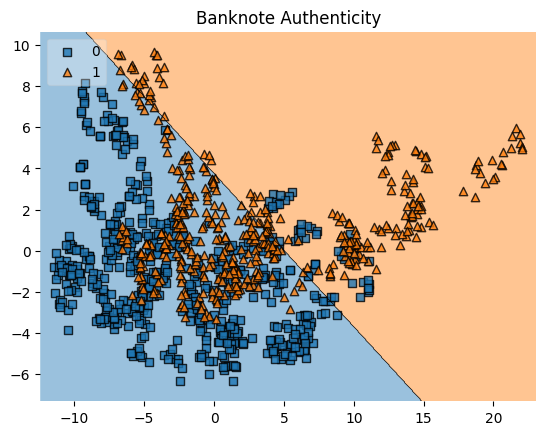

In [117]:
pca = decomposition.PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)
svc.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=svc, legend=2)
plt.title("Banknote Authenticity")
plt.show()

Calculate the score. Higher the value, better the model

In [118]:
metrics.accuracy_score(y_test, y_model_outcome)

0.9563636363636364

## Banknote dataset - Decision Trees

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import svm, model_selection, decomposition, metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()

Separate input data into two classes based on labels

In [126]:
input_file = 'data_banknote_authentication.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :2], data[:, -1]
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Visualize input data

/var/folders/m1/6hxk4zgd2qs_t47zqlh283_m0000gn/T/ipykernel_36321/4094302561.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


Text(0.5, 1.0, 'Input data')

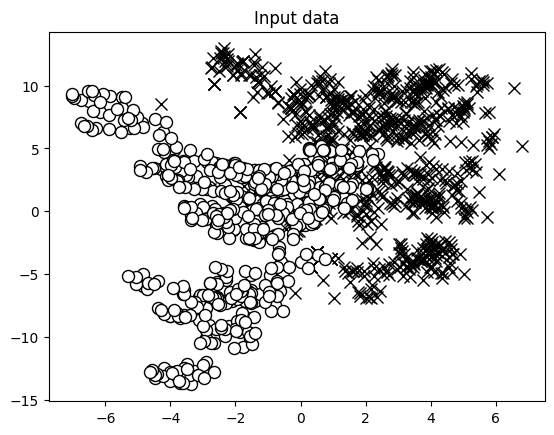

In [127]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

Split data into training and testing datasets 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

Decision Trees classifier 

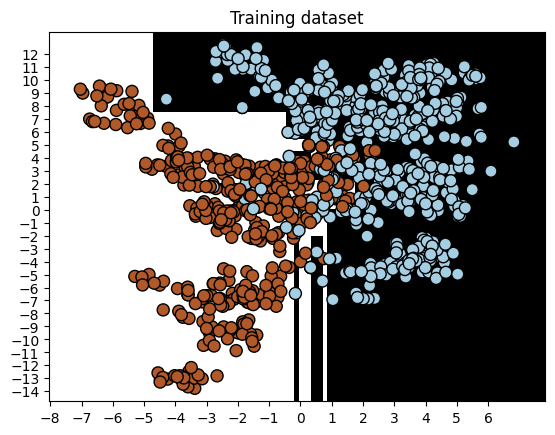

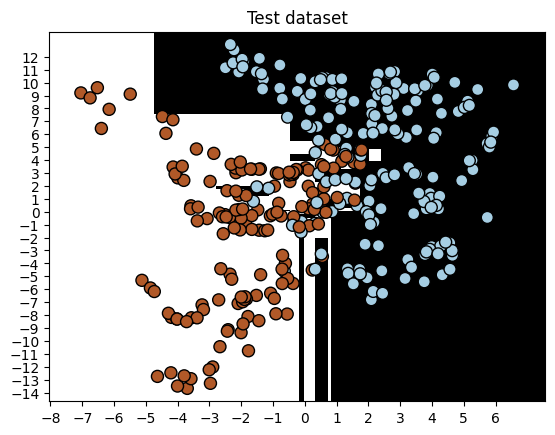

In [129]:
params = {'random_state': 0, 'max_depth': 8}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

### Evaluate classifier performance

Classifier performance on training dataset:

In [130]:
class_names = ['Class-0', 'Class-1']
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

              precision    recall  f1-score   support

     Class-0       0.99      0.99      0.99       576
     Class-1       0.98      0.98      0.98       453

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029



Classifier performance on test dataset:

In [131]:
print(classification_report(y_test, y_test_pred, target_names=class_names))

              precision    recall  f1-score   support

     Class-0       0.94      0.94      0.94       186
     Class-1       0.93      0.93      0.93       157

    accuracy                           0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343



## Haberman dataset - SVC

In [132]:
with open("data_haberman.json") as haberman:
    haberman = json.load(haberman)
X_train, X_test, y_train, y_test = model_selection.train_test_split(haberman['data'], np.array(haberman['target']), test_size=0.2)

Create the SVC model and start training

In [133]:
svc = svm.SVC(kernel='rbf', C=15000, gamma=0.09)
svc.fit(X_train, y_train)

SVC(C=15000, gamma=0.09)

Compare a section of model results with desired outcomes

In [134]:
y_model_outcome = svc.predict(X_test)
print(f"First 10 results for Haberman's survival")
print(f"Model: {y_model_outcome[0:10]}")
print(f"Goal: {y_test[0:10]}")

First 10 results for Haberman's survival
Model: [1 1 1 2 2 1 1 1 1 1]
Goal: [2 1 1 1 1 2 2 1 1 2]


Reduce dimension whilst keeping the data structure with the goal of visualizing the data on a simple x,y chart

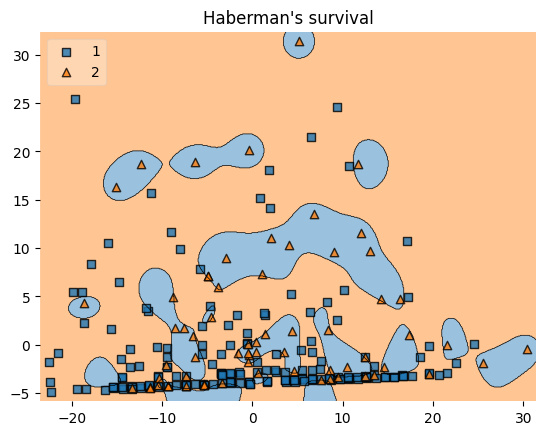

In [135]:
pca = decomposition.PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)
svc.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=svc, legend=2)
plt.title("Haberman's survival")
plt.show()

Calculate the score. Higher the value, better the model

In [136]:
metrics.accuracy_score(y_test, y_model_outcome)

0.6774193548387096

## Haberman dataset - Decision Trees

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import svm, model_selection, decomposition, metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [138]:
input_file = 'haberman.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :2], data[:, -1]

Separate input data into two classes based on labels

In [139]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Visualize input data

/var/folders/m1/6hxk4zgd2qs_t47zqlh283_m0000gn/T/ipykernel_36321/4094302561.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


Text(0.5, 1.0, 'Input data')

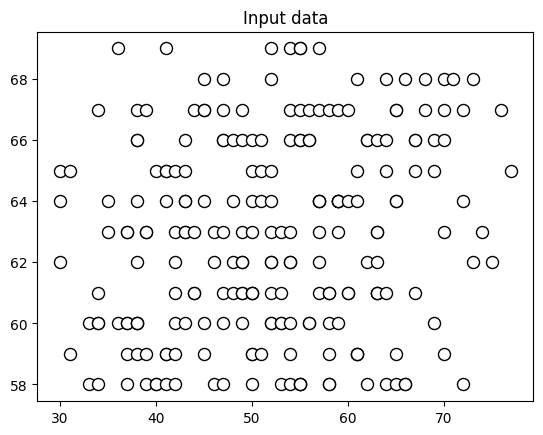

In [140]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

Split data into training and testing datasets 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

Decision Trees classifier 

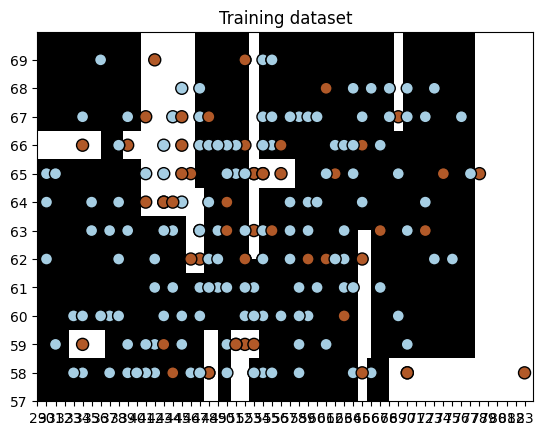

In [142]:
params = {'random_state': 0, 'max_depth': 8}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

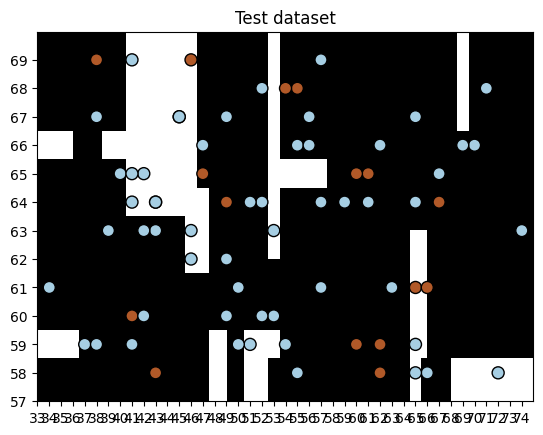

In [143]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

### Evaluate classifier performance

Classifier performance on training dataset

In [144]:
class_names = ['Class-0', 'Class-1']
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

              precision    recall  f1-score   support

     Class-0       0.84      0.96      0.90       165
     Class-1       0.83      0.55      0.66        64

    accuracy                           0.84       229
   macro avg       0.84      0.75      0.78       229
weighted avg       0.84      0.84      0.83       229



Classifier performance on test dataset

In [145]:
print(classification_report(y_test, y_test_pred, target_names=class_names))

              precision    recall  f1-score   support

     Class-0       0.76      0.75      0.76        60
     Class-1       0.17      0.18      0.17        17

    accuracy                           0.62        77
   macro avg       0.46      0.46      0.46        77
weighted avg       0.63      0.62      0.63        77

